<a href="https://colab.research.google.com/github/stephe-hu/testing/blob/main/hha504assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading in packages

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Exploration and Analysis

## Data from NewYork Presbyterian Hospital

In [ ]:
# Load in data
df_nyp = pd.read_json('https://raw.githubusercontent.com/stephe-hu/sqlite_database_operations/main/data/133957095_NewYorkPresbyterianHospital_standardcharges.json')
df_nyp

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [ ]:
# Cleaning column names
df_nyp.columns = df_nyp.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# Look for missingness
df_nyp.isnull().sum()

code_(cpt/drg)                          0
description                             0
rev_code                                0
inpatient/outpatient                    0
gross_charges                           0
discounted_cash_price                   0
aetna                                   0
cigna                                   0
empire_blue_cross_blue_shield           0
emblem_health                           0
united_health_group                     0
aetna_medicare                          0
agewell_medicare                        0
emblem_medicare                         0
empire_medicare                         0
fidelis_medicare                        0
healthfirst_medicare                    0
uhc_community_plan/united_medicare      0
vns_medicare                            0
wellcare_medicare                       0
1199                                    0
affinity_molina_essential               0
affinity_molina_medicaid/chp            0
amida_care_medicaid               

In [ ]:
# Drop rows with any NaN values
df_nyp.dropna(inplace=True)
df_nyp

,code_(cpt/drg),description,rev_code,inpatient/outpatient,gross_charges,discounted_cash_price,aetna,cigna,empire_blue_cross_blue_shield,emblem_health,...,consumer_health_network,devon,equian,first_health,magnacare,multiplan/beechstreet/phcs,qhm,worldwide,minimum_negotiated_charge,maximum_negotiated_charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [ ]:
# Checking column tpyes
df_nyp.dtypes

code_(cpt/drg)                         object
description                            object
rev_code                               object
inpatient/outpatient                   object
gross_charges                         float64
discounted_cash_price                 float64
aetna                                  object
cigna                                  object
empire_blue_cross_blue_shield          object
emblem_health                          object
united_health_group                    object
aetna_medicare                         object
agewell_medicare                       object
emblem_medicare                        object
empire_medicare                        object
fidelis_medicare                       object
healthfirst_medicare                   object
uhc_community_plan/united_medicare     object
vns_medicare                           object
wellcare_medicare                      object
1199                                   object
affinity_molina_essential         

In [ ]:
# Statistical description
df_nyp.describe()

,gross_charges,discounted_cash_price,minimum_negotiated_charge,maximum_negotiated_charge
count,5.912000e+03,5.912000e+03,5912.000000,5.912000e+03
mean,3.355080e+04,3.355080e+04,2249.918880,2.390277e+04
std,9.718759e+04,9.718759e+04,6015.717204,7.136503e+04
min,1.000000e+00,1.000000e+00,0.454400,1.608000e+00
25%,5.835000e+02,5.835000e+02,122.228437,6.380010e+02
50%,3.968000e+03,3.968000e+03,431.142905,4.086731e+03
75%,3.163600e+04,3.163600e+04,2107.000000,1.925640e+04
max,2.538980e+06,2.538980e+06,204861.126000,1.713460e+06


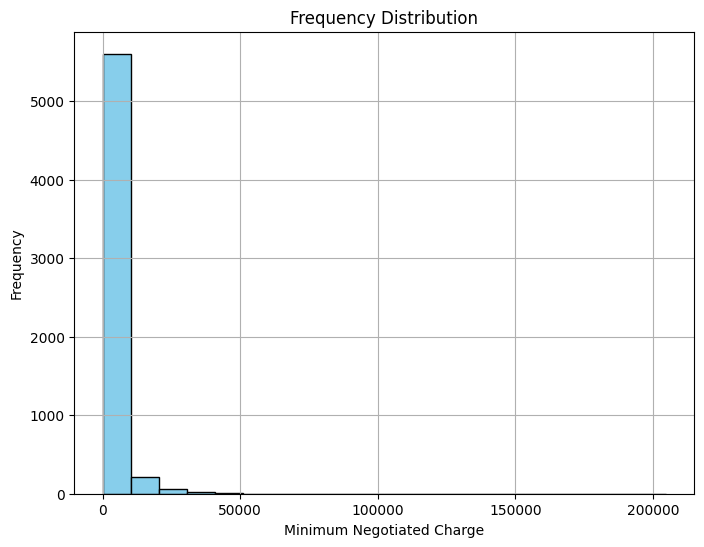

In [ ]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_nyp['minimum_negotiated_charge'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Minimum Negotiated Charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Frequency counts for columns
df_nyp['inpatient/outpatient'].value_counts()

Inpatient/Outpatient    5189
Inpatient                723
Name: inpatient/outpatient, dtype: int64

## Data from Stony Brook Hospital

In [ ]:
# Load in data
df_sb = pd.read_csv('https://raw.githubusercontent.com/stephe-hu/sqlite_database_operations/main/data/stonybrook.csv')
df_sb

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cleaning column names
df_sb.columns = df_sb.columns.str.strip().str.lower().str.replace(' ', '_')

# Look for missingness
df_sb.isnull().sum()

code                                               0
description                                        0
type                                             783
package/line_level                               783
gross_charge                                       0
discounted_cash_price                              0
de-identified_min_contracted_rate               1456
de-identified_max_contracted_rate               1456
derived_contracted_rate                         1456
1199-commercial_other                           6696
aetna-medicare_advantage_hmo                    6604
aetna-commercial_hmo/pos                        5883
aetna-commercial_ppo/open_access                6098
aetna-commercial_other                          7582
empire_health-commercial_other                  4650
empire_health-commercial_ppo/open_access        5308
bluecross_blueshield-commercial_other           6456
beacon_health-commercial_other                  7707
carelon_health-commercial_other               

In [ ]:
# Checking column tpyes
df_sb.dtypes

code                                             object
description                                      object
type                                             object
package/line_level                               object
gross_charge                                    float64
discounted_cash_price                           float64
de-identified_min_contracted_rate               float64
de-identified_max_contracted_rate               float64
derived_contracted_rate                         float64
1199-commercial_other                           float64
aetna-medicare_advantage_hmo                    float64
aetna-commercial_hmo/pos                        float64
aetna-commercial_ppo/open_access                float64
aetna-commercial_other                          float64
empire_health-commercial_other                  float64
empire_health-commercial_ppo/open_access        float64
bluecross_blueshield-commercial_other           float64
beacon_health-commercial_other                  

In [ ]:
# Statistical description
df_sb.describe()

,gross_charge,discounted_cash_price,de-identified_min_contracted_rate,de-identified_max_contracted_rate,derived_contracted_rate,1199-commercial_other,aetna-medicare_advantage_hmo,aetna-commercial_hmo/pos,aetna-commercial_ppo/open_access,aetna-commercial_other,...,optum-commercial_other,oxford-commercial_other,oxford-commercial_hmo/pos,tricare-commercial_other,united_healthcare-commercial_other,united_healthcare-medicare_advantage_hmo,united_healthcare-commercial_hmo/pos,united_healthcare-medicaid_hmo,united_healthcare-commercial_ppo/open_access,veteran_family-commercial_other
count,7.710000e+03,7.710000e+03,6254.000000,6.254000e+03,6254.000000,1014.000000,1106.000000,1827.000000,1612.000000,128.000000,...,943.000000,1777.000000,0.0,434.000000,2357.000000,624.000000,133.000000,2065.000000,357.000000,46.000000
mean,2.274832e+04,2.274832e+04,4090.693876,1.003579e+04,6315.587725,5791.542456,5614.005027,4320.418248,4436.188381,1703.756250,...,10868.205705,2572.653849,NaN,2070.212120,5977.464298,4438.776234,3261.594586,2454.314228,789.416667,702.261087
std,7.470570e+04,7.470570e+04,10576.213503,2.915075e+04,14601.846406,24302.352403,12671.487487,8718.537182,8881.733882,5124.232802,...,20703.429246,4036.667401,NaN,8501.228677,16227.981498,9982.579323,10266.478193,11009.140577,2880.486830,1717.006016
min,3.000000e-02,3.000000e-02,0.010000,1.000000e-01,0.030000,0.010000,1.100000,0.020000,0.500000,0.590000,...,2.370000,0.010000,NaN,1.000000,0.010000,1.330000,0.190000,0.010000,0.180000,2.480000
25%,1.065895e+03,1.065895e+03,96.520000,6.982500e+02,403.117500,148.797500,125.070000,277.900000,312.750000,110.387500,...,200.450000,197.880000,NaN,71.220000,258.500000,96.290000,129.000000,42.980000,8.400000,26.810000
50%,4.745295e+03,4.745295e+03,1108.860000,4.311000e+03,2600.740000,974.400000,714.860000,2153.000000,2153.000000,404.500000,...,1700.200000,1932.380000,NaN,236.230000,1571.000000,387.500000,444.000000,425.790000,34.830000,82.710000
75%,1.103881e+04,1.103881e+04,4309.532500,8.170000e+03,5870.540000,4592.000000,5782.430000,4822.000000,4822.000000,1778.920000,...,13359.895000,4704.000000,NaN,1486.947500,5127.000000,3531.920000,2257.430000,1753.100000,286.800000,235.000000
max,1.857952e+06,1.857952e+06,327869.690000,1.302636e+06,370099.900000,331304.280000,157848.600000,99999.990000,96372.570000,54838.130000,...,277267.380000,80891.260000,NaN,154940.610000,291490.750000,92493.910000,88051.340000,327869.690000,26350.000000,7195.400000


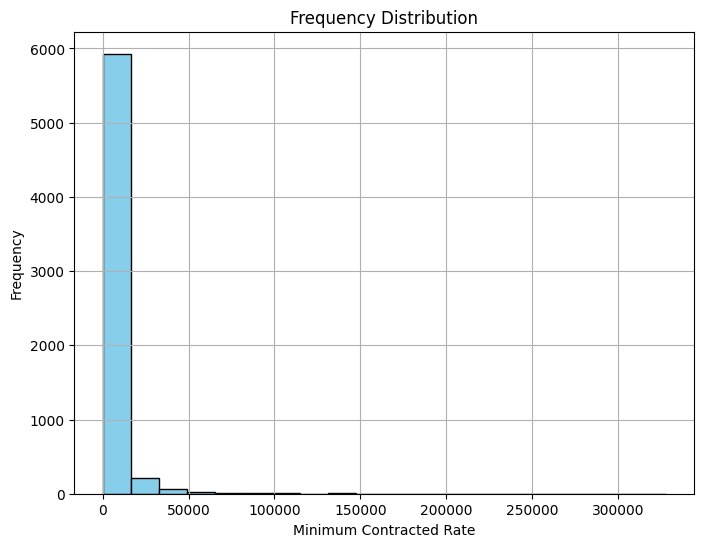

In [ ]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_sb['de-identified_min_contracted_rate'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Minimum Contracted Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Frequency counts for columns
sb_code = df_sb['code'].value_counts()
sb_descrip = df_sb['description'].value_counts()
sb_type = df_sb['type'].value_counts()
sb_lvl = df_sb['package/line_level'].value_counts()

print(f"Frequency count for code: \n{sb_code}\n")
print(f"Frequency count for description: \n{sb_descrip}\n")
print(f"Frequency count for type: \n{sb_type}\n")
print(f"Frequency count for package/line_level: \n{sb_lvl}\n")


Frequency count for code: 
73521       2
64600       2
64454       2
64461       2
64483       2
           ..
C1727       1
C1728       1
C1729       1
C1730       1
30000004    1
Name: code, Length: 5474, dtype: int64

Frequency count for description: 
R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                     

## Observations


*   In both hospitals, outpatient services are more frequent than inpatient.
*   Compared to Stony Brook Hospital, NewYork Presbyterian Hospital has a higher average gross charge and discounted cash price.



# 2. SQLite Database Operations

## Create a local DB

In [ ]:
# Create local SQLite DB
conn = sqlite3.connect('health.db')
c = conn.cursor()

## Manual table creation

In [ ]:
# Create new table
c.execute("""
            CREATE TABLE health_data
                (
                    hospital_name text,
                    insurance_type text,
                    code text,
                    code_description text,
                    cost_negotiated real,
                    cost_minimum real,
                    cost_maximum real
                );
          """)

conn.commit()


In [ ]:
# Insert new data
sql_query = """
INSERT INTO health_data (
  'hospital_name',
  'insurance_type',
  'code',
  'code_description',
  'cost_negotiated',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'southampton hospital',
    'aetna',
    '99214',
    'cost visit',
    100.0,
    1.00,
    10000.0
  );
"""

c.execute(sql_query)
conn.commit()

In [ ]:
# Check that data has been inserted
sql_query_2 = """
select *
from health_data;
"""

c.execute(sql_query_2)
print(c.fetchall())

[('southampton hospital', 'aetna', '99214', 'cost visit', 100.0, 1.0, 10000.0)]


In [ ]:
# Create engine to connect to our sqlite DB
engine = create_engine('sqlite:///costs.db')

# Check using pandas
healthdata = pd.read_sql("select * from health_data;", conn)
healthdata

,hospital_name,insurance_type,code,code_description,cost_negotiated,cost_minimum,cost_maximum
0,southampton hospital,aetna,99214,cost visit,100.0,1.0,10000.0


## Automatic table creation

In [ ]:
# Load in data
df = pd.read_csv('https://raw.githubusercontent.com/stephe-hu/sqlite_database_operations/main/data/stonybrook.csv')

In [ ]:
# Push pandas dataframe into sql table
df.to_sql('health_data', conn, if_exists='replace')

7710

In [ ]:
# Check for table
query = """
  select *
  from health_data
  where type = 'Outpatient'
  limit 100;
"""

# Create new df called response
response = pd.read_sql(query, conn)
response

,index,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
1,1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,...,NaN,4782.0,None,NaN,3845.25,NaN,None,658.94,None,None
2,2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,...,NaN,4782.0,None,NaN,3845.25,NaN,None,658.94,None,None
3,3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
4,4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,...,NaN,NaN,None,NaN,5127.00,NaN,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,11601,"REMOVAL OF CANCER SKIN GROWTH OF BODY, ARMS, O...",Outpatient,Line,1818.15,1818.15,1077.75,1077.75,1077.75,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
96,96,11601,"REMOVAL OF CANCER SKIN GROWTH OF BODY, ARMS, O...",Outpatient,Package,2286.15,2286.15,1077.75,1077.75,1077.75,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
97,97,11602,"REMOVAL OF CANCER SKIN GROWTH OF BODY, ARMS, O...",Outpatient,Line,5642.76,5642.76,4311.00,4311.00,4311.00,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
98,98,11602,"REMOVAL OF CANCER SKIN GROWTH OF BODY, ARMS, O...",Outpatient,Package,6083.63,6083.63,4311.00,4311.00,4311.00,...,NaN,NaN,None,NaN,NaN,NaN,None,NaN,None,None
